# Project: Credit Risk Prediction
**This project  aims to develop a predictive model that accurately assesses the likelihood of a loan default using various Machine learning algorithms. This predictive capability is crucial for financial institutions to mitigate risks, make informed lending decisions, and enhance overall financial stability. Effective credit risk assessment helps in reducing default rates and ensuring sustainable lending practices.**


| Feature Name                | Description                                                  |
|-----------------------------|------------------------------------------------------------- |       
| person_age                  | Age                                                          |
| person_income               | Annual Income in rands                                       |
| person_home_ownership       | Home ownership (Rent, Mortage, own, other)                   |
| person_emp_length           | Employment length (in years)                                 |
| loan_intent                 | Loan intent ( Educatiom, Persoanl, venture, medical,etc      |
| loan_grade                  | Loan grade (A,B,C...G)                                       |
| loan_amnt                   | Loan amount in rands                                         |
| loan_int_rate               | Interest rate                                                |
| loan_status                 | Loan status (0 is non default 1 is default)                  |
| loan_percent_income         | Percent income                                               |
| cb_person_default_on_file   | Historical default (Y, N)                                    |
| cb_preson_cred_hist_length  | Credit history length                                        |


In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb

In [9]:
# Reading the dataset
df=pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Exploratory Data Analysis

In [10]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [13]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 165


In [14]:
# Drop all duplicated rows
df1= df.drop_duplicates()

In [15]:
# Verifying if the duplicated rows are removed
duplicates = df1.duplicated()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [16]:
# Checking missing values
df1.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [17]:
# Handling missing values
# Replace missing values in 'person_emp_length' with the mean value of the column
# Replace missing values in 'loan_int_rate' with the mean value of the column

if 'person_emp_length_missing' in df1.columns:
    df1.drop(columns=['person_emp_length_missing'], inplace=True)
if 'loan_int_rate_missing' in df1.columns:
    df1.drop(columns=['loan_int_rate_missing'], inplace=True)

df1.loc[:, 'person_emp_length'] = df1['person_emp_length'].fillna(df1['person_emp_length'].mean())
df1.loc[:, 'loan_int_rate'] = df1['loan_int_rate'].fillna(df1['loan_int_rate'].mean())

In [18]:
# verifying if there are still missing values
df1.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [19]:
df1["person_income"].value_counts()

person_income
60000    1040
30000     844
50000     772
40000     655
45000     586
         ... 
56403       1
47520       1
54316       1
54480       1
4888        1
Name: count, Length: 4295, dtype: int64

In [20]:
df1.loan_status.value_counts()

loan_status
0    25327
1     7089
Name: count, dtype: int64

# Exploring the Distributions and relationship between variables

#  distributions of the continous variable

In [21]:
# Set the float format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Display the descriptive statistics
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.00,32416.00,32416.00,32416.00,32416.00,32416.00,32416.00,32416.00
mean,27.75,66091.64,4.79,9593.85,11.02,0.22,0.17,5.81
std,6.35,62015.58,4.09,6322.73,3.08,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38542.00,2.00,5000.00,8.49,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,11.02,0.00,0.15,4.00
75%,30.00,79218.00,7.00,12250.00,13.11,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


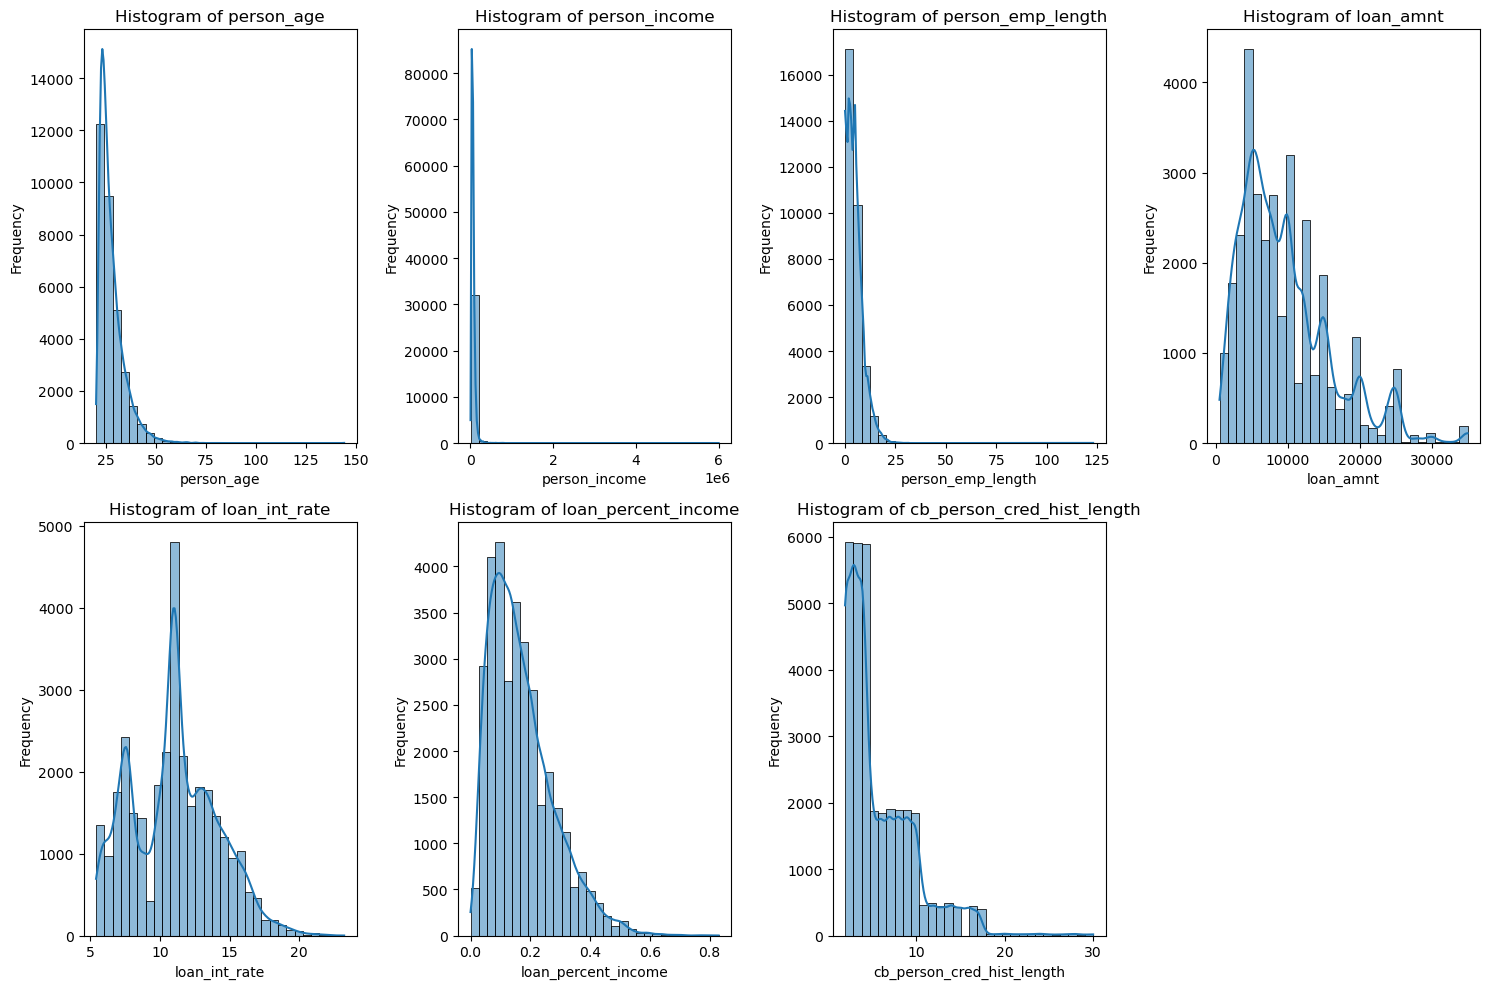

In [22]:

# Define numerical features
numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Set figure size
plt.figure(figsize=(15, 10))

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df1[feature], bins=30, kde=True)  
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

**1. Person_Age**:

The age distribution is right-skewed with the majority of individuals being young                    adults. Most values are concentrated between 20 and 40 years, with a sharp decline in                   frequency for ages above 40.

**2. Person_income**:
The income distribution is heavily right-skewed. A large number of individuals have low to moderate annual incomes, with very few earning extremely high incomes.

**3. person_emp_length**: The employment length distribution is also right-skewed. Most individuals have a relatively short employment length, with the frequency dropping significantly as the number of years increases.

**4. Loan Amount**
The loan amount distribution shows a peak around the lower loan amounts and gradually decreases as the loan amount increases.

**5.loan_int_rate**: The interest rate distribution appears to be bimodal, with peaks around lower and moderate interest rates. Most loans have interest rates between 5% and 15%.

**6. Loan_percent_income**
This distribution is right-skewed, indicating that for most individuals, the loan amount constitutes a smaller percentage of their income. Few individuals have loans that constitute a higher percentage of their income.

**7. cb_person_cred_hist_length**:
The credit history length distribution is right-skewed, with most individuals having a shorter credit history.    

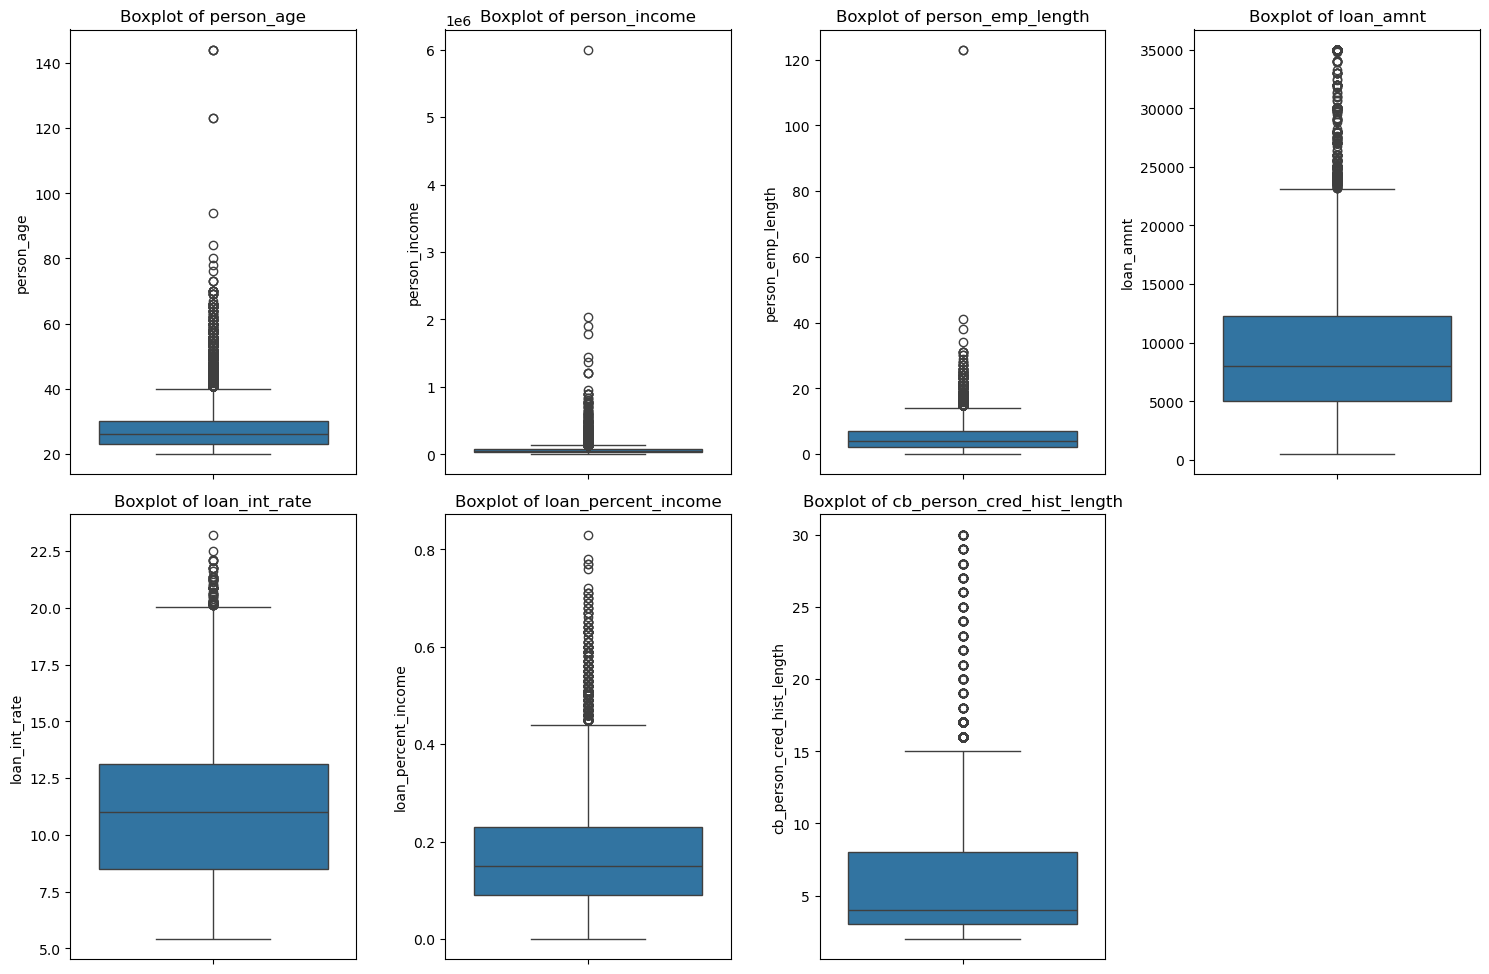

In [23]:
# Define numerical features
numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Set figure size
plt.figure(figsize=(15, 10))

# Plot boxplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df1[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

Based on the boxplots provided for each continuous variable, here are the outliers and anomalies observed, along with potential actions to address them:

* Age above 60 are considered outliers as older people are not likely to qualify for a loan. We can see an extreme outlier of 144 which is highly unusual and likely an error or anomaly. his value significantly exceeds the average human lifespan and should be investigated or corrected. 

* The person's income variable shows outliers an extremely high income of R6000000 which needs proper handling

* The boxplot for person_emp_length (employment length) shows a significant number of outliers, with values exceeding the typical working age range. The most notable anomaly is an employment length of 123 years, which is unrealistic given human lifespans.

* Interest rates above 17.5% are considered outliers, with extreme values around 23.22%.



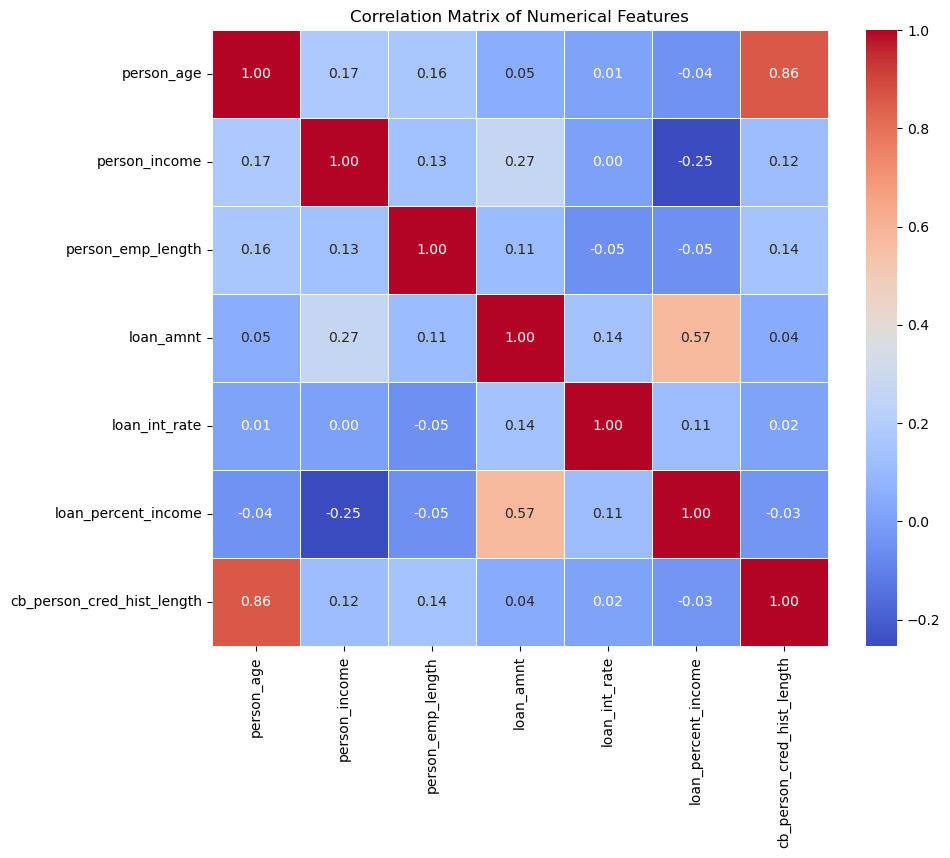

In [24]:
# Select numerical features
numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Calculate correlation matrix
corr_matrix = df1[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f",
            annot_kws={"size": 10}, linewidths=0.5)

plt.title('Correlation Matrix of Numerical Features')
plt.show()

From the correlation matrix above, Person_age variable is highly correlated with credit history length with a correlation coefficient of 0.86. One of the variable has to be dropped or engineered to improve the model performance.

# Distributions of Categorical variables

In [25]:
# Define a mapping dictionary
intent_mapping = {
    'PERSONAL': 1,
    'MEDICAL': 2,
    'EDUCATION': 3,
    'VENTURE': 4,
    'DEBTCONSOLIDATION': 5,
    'HOMEIMPROVEMENT': 6
}

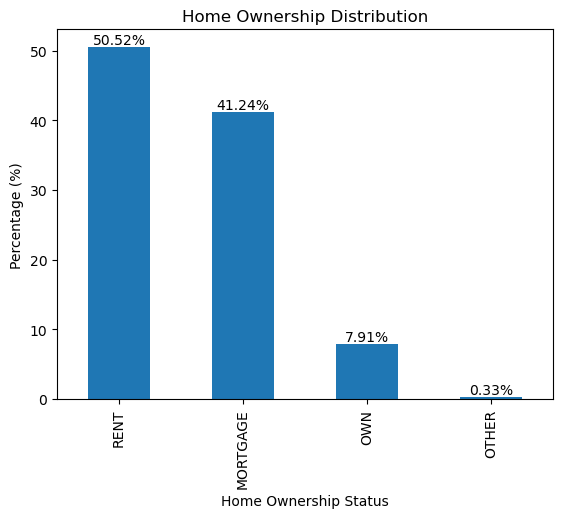

In [26]:
# Calculate the value counts and then normalize to get percentages
home_ownership_percentages = df1['person_home_ownership'].value_counts(normalize=True) * 100

# Plotting the bar chart
ax = home_ownership_percentages.plot(kind='bar')

# Adding titles and labels
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership Status')
plt.ylabel('Percentage (%)')

# Annotating each bar with its percentage value
for index, value in enumerate(home_ownership_percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

**Home Ownership Distribution**
* The majority of individuals (50,52% are renting their homes which might be seen as higher risk by financial institutions  due to less financial stability as compared to those who own their homes or have mortgage.

* A significant portion of individuals (41,24%) have mortages. Individuals with mortages might have more financial obligations, but they have a home as an asset which can be used as collateral, which might make them less risky compared to renters.

* A smaller portion of individuals (7.91%) own their homes. Homeowners without mortgages might be perceived as the least risky group since they own a valuable asset and potentially have fewer financial obligations.
* A very small percentages of 0.33% fall into " other" group.

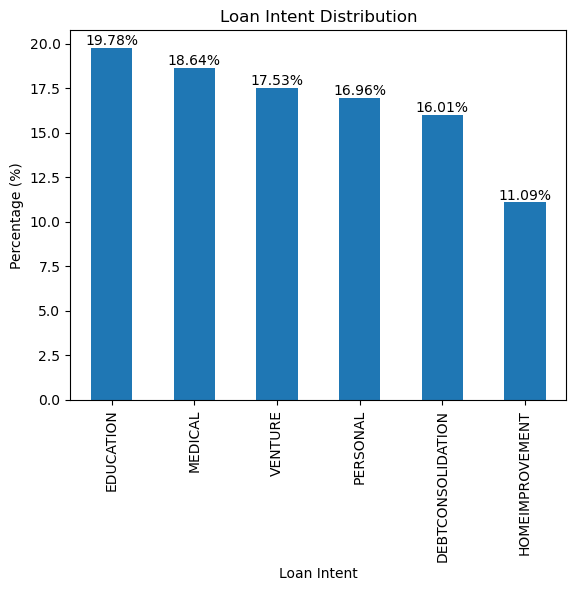

In [27]:
# Define a mapping dictionary
intent_mapping = {
    'PERSONAL': 1,
    'MEDICAL': 2,
    'EDUCATION': 3,
    'VENTURE': 4,
    'DEBTCONSOLIDATION': 5,
    'HOMEIMPROVEMENT': 6
}

# Calculate the value counts and then normalize to get percentages
loan_intent_percentages = df1['loan_intent'].value_counts(normalize=True) * 100

# Plotting the bar chart
ax = loan_intent_percentages.plot(kind='bar')

# Adding titles and labels
plt.title('Loan Intent Distribution')
plt.xlabel('Loan Intent')
plt.ylabel('Percentage (%)')

# Annotating each bar with its percentage value
for index, value in enumerate(loan_intent_percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()


**Loan intent distribution**

* The highest proportion of loans (19.78%) are taken for education purposes. Education loans are often seen as investments in future earning potential. Borrowers might be students or parents seeking to finance education expenses. The high proportion indicates a significant demand for educational financing.
* The second highest percentage of loans is for medical purposes, this suggest that many individuals require loans to cover medical costs.
* Loans intended for ventures or business purposes make up a notable portion. This indicates that entrepreneurial activities are a common reason for seeking loans.
* Personal loans, which can be used for various personal expenses, also constitute a significant percentage. This category is often broad and can include many different uses
* Loans for debt consolidation are also common, indicating that many individuals use loans to manage and consolidate their existing debts.
* The Smallest Percentage of loans are for home improvement 

Overall, the bar chart indicates that Education, Medical, Venture, and personal purposes are most common reasons for individuals seeking loans.


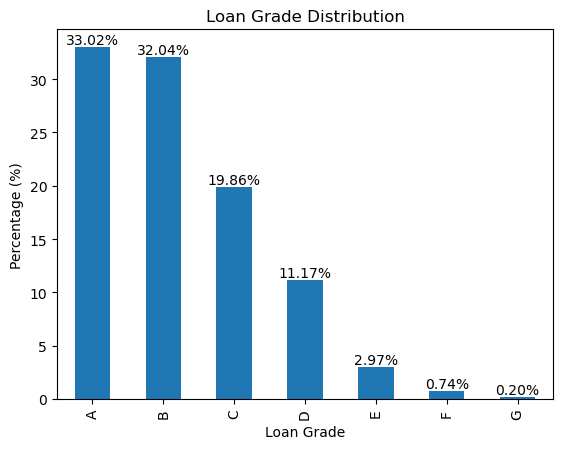

In [28]:
# Calculate the value counts and then normalize to get percentages
loan_grade_percentages = df1['loan_grade'].value_counts(normalize=True) * 100

# Plotting the bar chart
ax = loan_grade_percentages.plot(kind='bar')

# Adding titles and labels
plt.title('Loan Grade Distribution')
plt.xlabel('Loan Grade')
plt.ylabel('Percentage (%)')

# Annotating each bar with its percentage value
for index, value in enumerate(loan_grade_percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()


* The largest proportion of loans fall under grade A, indicating high credit quality.
* he second largest group, nearly as large as grade A, indicating a slightly lower but still high credit quality.
* A significant proportion of loans are of grade C, indicating moderate credit quality
* A smaller percentage of loans are of grade D, indicating lower credit quality.
* A small proportion of loans fall under grade E, indicating relatively low credit quality.
* very few loans are of grade F, indicating poor credit quality.
* The smallest proportion fall under grade G, indicating the poorest credit quality

From this distribution, it's evident that the majority of loans in the dataset are of high to moderate quality (grades A, B, and C), with very few loans falling into the lowest quality categories (grades F and G). 


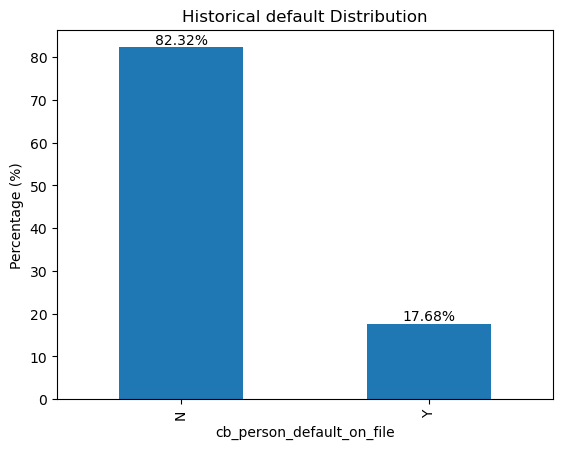

In [29]:
# Calculate the value counts and then normalize to get percentages
person_default_percentages = df1['cb_person_default_on_file'].value_counts(normalize=True) * 100

# Plotting the bar chart
ax = person_default_percentages.plot(kind='bar')

# Adding titles and labels
plt.title('Historical default Distribution')
plt.xlabel('cb_person_default_on_file')
plt.ylabel('Percentage (%)')

# Annotating each bar with its percentage value
for index, value in enumerate(person_default_percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

**Historical default distribution**
* 82.32% of individuals have no historical debts on file which means that the majority of individuals in the dataset have not defaulted on any loans in the past.
* 17.68% of individuals have a historical default on file. This indicates that a smaller proportion of individuals have a record of defaulting on loans.

This information could be crucial in assessing credit risk, as individuals with historical defaults may be more likely to default again compared to those with no default history.

# Identification and handling outliers 

In [30]:
# Define numerical features
numerical_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Initialize an empty dictionary to store outlier counts
outlier_counts = {}

# Calculate Z scores for each numerical feature
for feature in numerical_features:
    z_scores = np.abs((df1[feature] - df1[feature].mean()) / df1[feature].std())
    # Count outliers (considering ±3 standard deviations as threshold)
    outliers = z_scores[z_scores > 3]
    outlier_counts[feature] = len(outliers)

# Print outlier counts for each variable
for feature, count in outlier_counts.items():
    print(f"Number of outliers in '{feature}': {count}")


Number of outliers in 'person_age': 557
Number of outliers in 'person_income': 232
Number of outliers in 'person_emp_length': 321
Number of outliers in 'loan_amnt': 336
Number of outliers in 'loan_int_rate': 51
Number of outliers in 'loan_percent_income': 335
Number of outliers in 'cb_person_cred_hist_length': 284


In [31]:
# from the boxplots we can see that more extreme outliers are in person's age income, person emp length, cb_preson_cred_hist_length

In [32]:
# Handling outliers

# Start with the original DataFrame
df_cleaned = df1

# Drop rows where person_age is greater than 65
df_cleaned = df_cleaned[df_cleaned['person_age'] <= 65]
print(f"Shape after removing ages greater than 65: {df_cleaned.shape}")

# Drop rows where person_income is greater than or equal to 1,000,000
df_cleaned = df_cleaned[df_cleaned['person_income'] < 1000000]
print(f"Shape after removing incomes greater than or equal to 1,000,000: {df_cleaned.shape}")

# Drop rows where person_emp_length is greater than or equal to 45
df_cleaned = df_cleaned[df_cleaned['person_emp_length'] < 45]
print(f"Shape after removing employment lengths greater than or equal to 45: {df_cleaned.shape}")

# Drop rows where loan_percent_income is greater than or equal to 0.6
df_cleaned = df_cleaned[df_cleaned['loan_percent_income'] < 0.6]
print(f"Shape after removing loan percent incomes greater than or equal to 0.6: {df_cleaned.shape}")

# Verify the final cleaned dataset shape
print(f"Final shape of cleaned dataset: {df_cleaned.shape}")



Shape after removing ages greater than 65: (32381, 12)
Shape after removing incomes greater than or equal to 1,000,000: (32373, 12)
Shape after removing employment lengths greater than or equal to 45: (32371, 12)
Shape after removing loan percent incomes greater than or equal to 0.6: (32311, 12)
Final shape of cleaned dataset: (32311, 12)


In [33]:
df_cleaned.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32311.00,32311.00,32311.00,32311.00,32311.00,32311.00,32311.00,32311.00
mean,27.69,65605.12,4.78,9576.83,11.02,0.22,0.17,5.79
std,6.06,47061.68,3.98,6310.28,3.08,0.41,0.10,4.02
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,39000.00,2.00,5000.00,8.49,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,11.02,0.00,0.15,4.00
75%,30.00,79428.00,7.00,12012.50,13.11,0.00,0.23,8.00
max,65.00,948000.00,38.00,35000.00,23.22,1.00,0.59,30.00


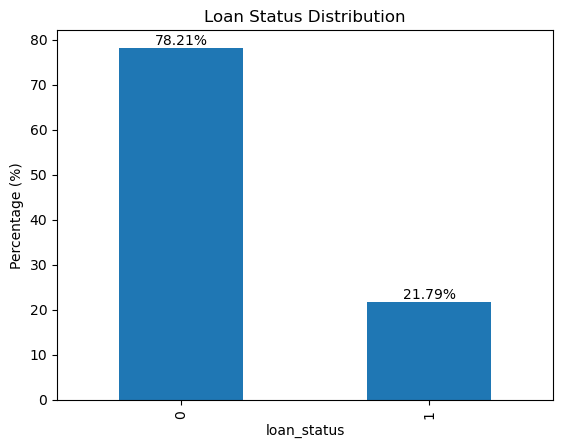

In [34]:
# Calculate the value counts and then normalize to get percentages
loan_status_percentages = df_cleaned['loan_status'].value_counts(normalize=True) * 100

# Plotting the bar chart
ax = loan_status_percentages.plot(kind='bar')

# Adding titles and labels
plt.title('Loan Status Distribution')
plt.xlabel('loan_status')
plt.ylabel('Percentage (%)')

# Annotating each bar with its percentage value
for index, value in enumerate(loan_status_percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

* Majority (78.21%) of loan applicants did not default, indicating that most borrowers were able to repay their loans as agreed. A smaller but significant portion (21.79%) of the loans defaulted, indicating that about one in five loans encountered repayment issues.
* The default rate (21.79%) highlights the need for robust risk management practices. Financial institution might need to further investigate the characteristics of defaulted loans to identify common risk factors and improve their credit assessment processes.

* The bar plot shows a significant class imbalance which can be problematic in model building.


# Relationship between numerical variables and target

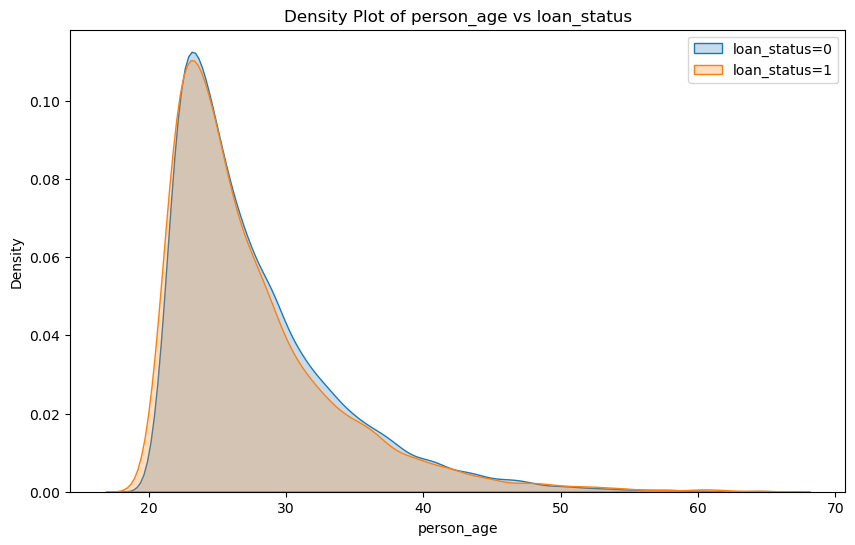

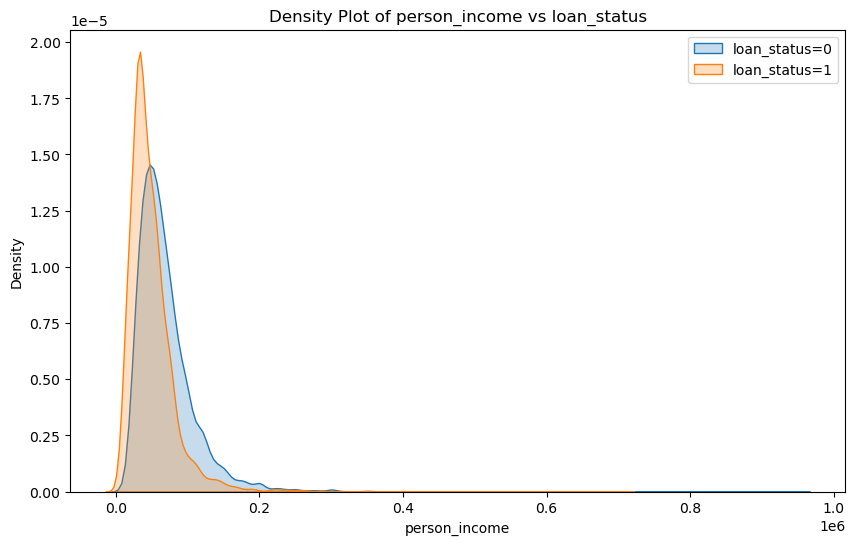

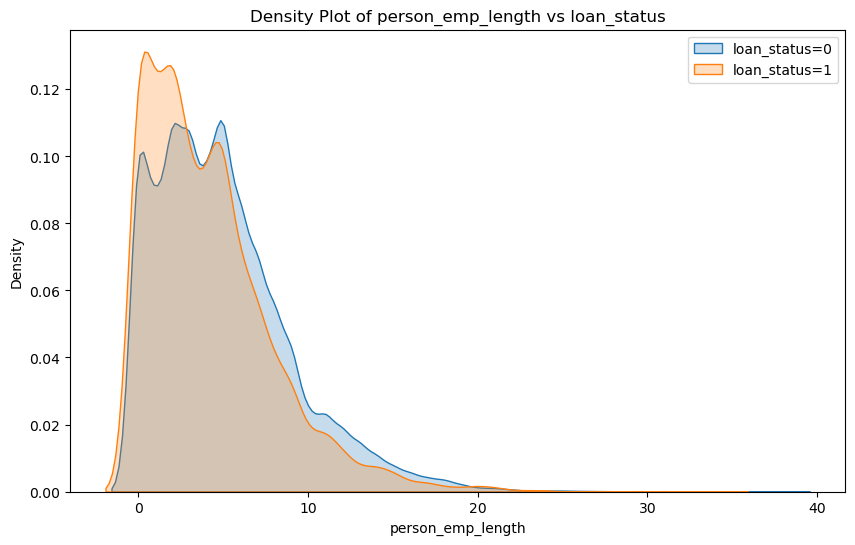

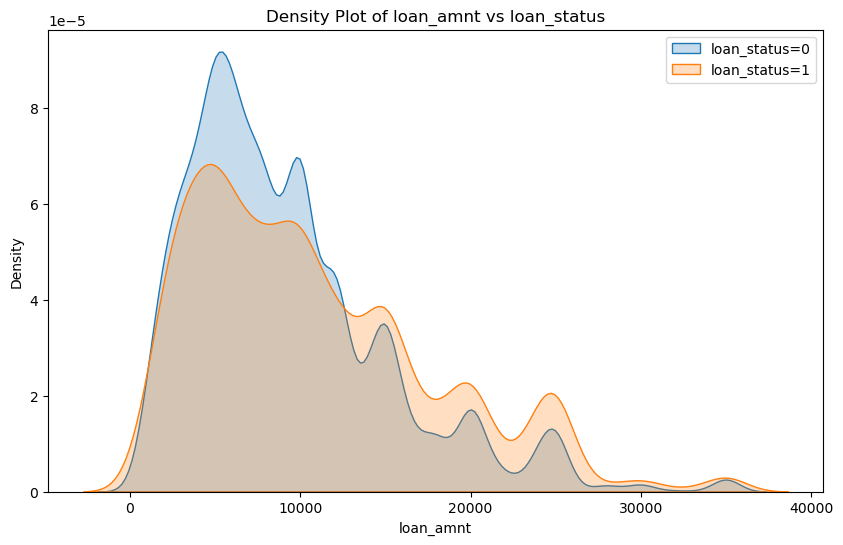

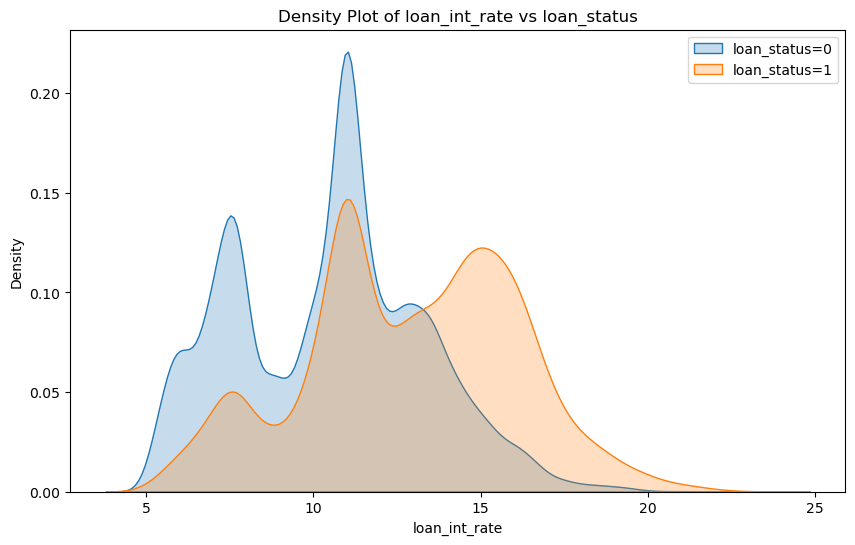

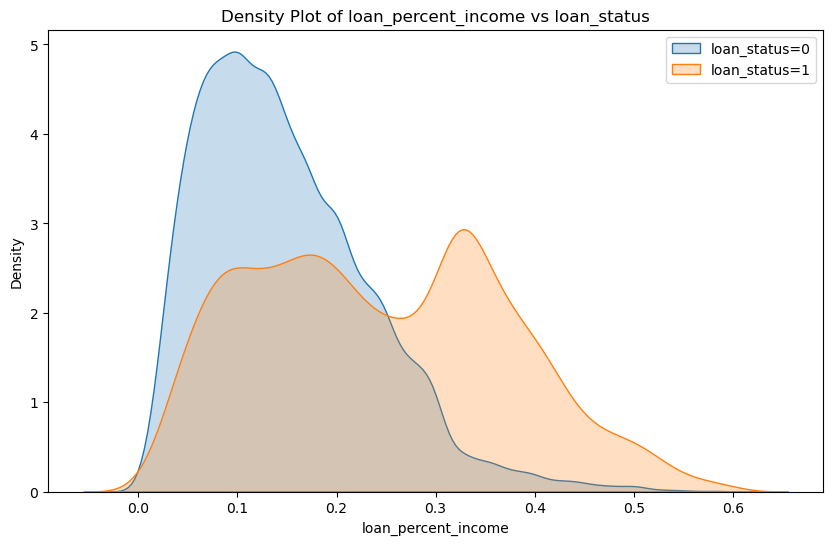

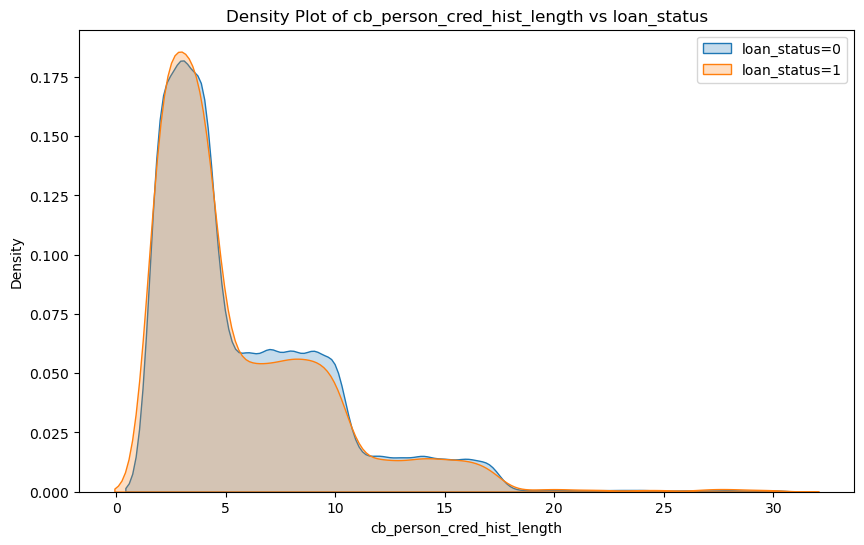

In [38]:
from matplotlib.backends.backend_pdf import PdfPages
# List of numerical features
Num_Features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Target feature
Target = 'loan_status'

# Density plots for numerical features
for feature in Num_Features:
    plt.figure(figsize=(10, 6))
    
    # Ensure the feature is treated as numeric without SettingWithCopyWarning
    df_cleaned.loc[:, feature] = pd.to_numeric(df_cleaned[feature], errors='coerce')
    
    # Plot density plot for each class in the target feature
    for label in df_cleaned[Target].unique():
        subset = df_cleaned[df_cleaned[Target] == label]
        sns.kdeplot(subset[feature], label=f'{Target}={label}', fill=True)
    
    plt.title(f'Density Plot of {feature} vs {Target}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    

# Visualizing the relatonship between categorical features versus target

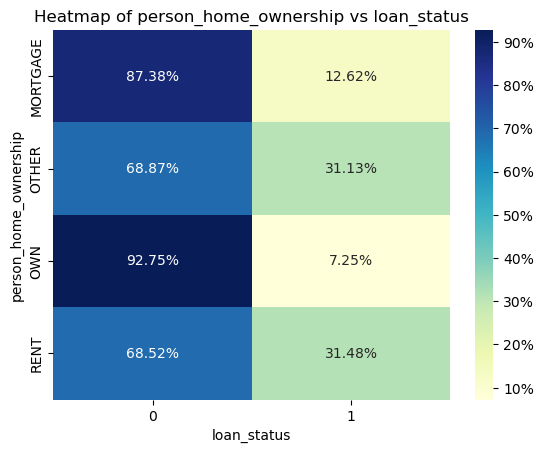

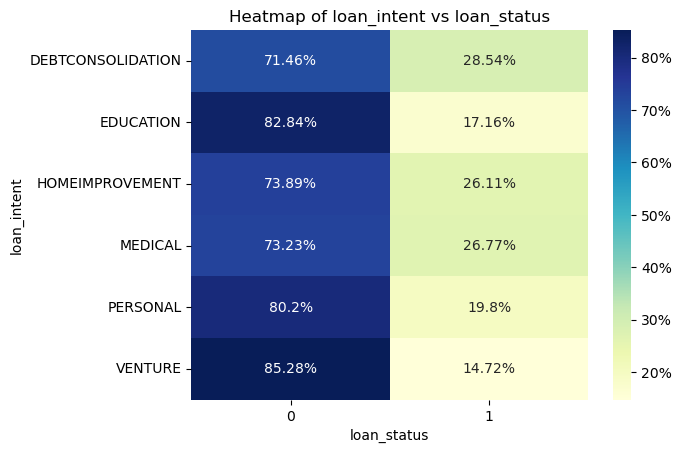

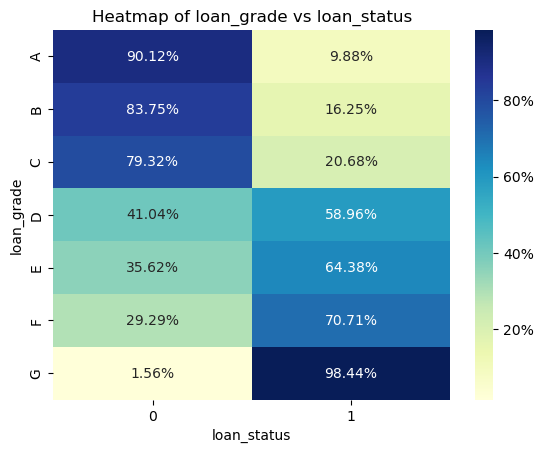

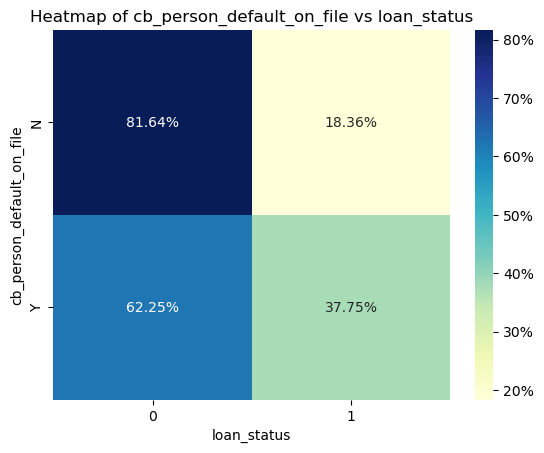

In [29]:
# List of categorical features
cat_Features = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

# Target feature
Target = 'loan_status'

# Function to plot heatmap of contingency table as percentages
def plot_heatmap(df_cleaned, feature, target):
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned[target], normalize='index') * 100
    # Format the annotation to include the percentage sign
    annot = contingency_table.astype(float).round(2).astype(str) + '%'
    sns.heatmap(contingency_table, annot=annot, fmt="", cmap="YlGnBu", cbar_kws={'format': '%.0f%%'})
    plt.title(f'Heatmap of {feature} vs {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

# Plot heatmaps for each categorical feature
for feature in cat_Features:
    plot_heatmap(df_cleaned, feature, Target)


# Feature Engineering

In [30]:
# Mapping for loan_grade
loan_grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# Mapping for cb_person_default_on_file
default_mapping = {
    'Y': 1,
    'N': 0
}

# Apply the mappings
df_cleaned['loan_grade'] = df_cleaned['loan_grade'].map(loan_grade_mapping)
df_cleaned['cb_person_default_on_file'] = df_cleaned['cb_person_default_on_file'].map(default_mapping)

In [31]:
# Create dummy variables for 'person_home_ownership' and ensure they are integers
dummies = pd.get_dummies(df_cleaned['person_home_ownership'], prefix='home_ownership', dtype=int)

# Concatenate the dummy variables with the original DataFrame
df_cleaned = pd.concat([df_cleaned, dummies], axis=1)

# Drop the original 'person_home_ownership' column
df_cleaned.drop(['person_home_ownership'], axis=1, inplace=True)

In [32]:
# Creating dummy variables for loan intent

dummies = pd.get_dummies(df_cleaned['loan_intent'], prefix='loan_intent', dtype=int)

# Concatenate the dummy variables with the original DataFrame
df_cleaned = pd.concat([df_cleaned, dummies], axis=1)

# Drop the original 'person_home_ownership' column
df_cleaned.drop(['loan_intent'], axis=1, inplace=True)

In [33]:
# Creating loan to income ratio
#This feature can provide insight into the borrower's ability to repay the loan. A lower ratio might indicate higher risk of default, while a higher ratio could suggest better financial stability.
df_cleaned['income_loan_ratio'] = df_cleaned['person_income'] / df_cleaned['loan_amnt']

In [34]:
x=df_cleaned.drop(['loan_status'], axis=1)
y=  df_cleaned['loan_status']

In [35]:
# Train test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
print(x_train.shape,x_test.shape)

(25848, 20) (6463, 20)


# Handling Class Imbalance

Class Imbalance occurs when classes in the target variable are not represented equally.In this case, there are significantly more non-default instances compared to default instances.

Models trained on imbalanced datasets can become biased towards the majority class. This means the model might predict the majority class more often simply because it sees more examples of it, leading to high accuracy but poor performance on the minority class.

Common performance metrics like accuracy can be misleading. For instance, predicting all loans as non-default would result in high accuracy (78%), but this model would be useless for identifying defaults.

SMOTE is applied to balance the training set

In [38]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [39]:
# Check the distribution of the target variable in the resampled training set
print(f'Distribution of target variable in the original training set: \n{y_train.value_counts()}')
print(f'Distribution of target variable in the resampled training set: \n{y_train_smote.value_counts()}')

Distribution of target variable in the original training set: 
loan_status
0    20218
1     5630
Name: count, dtype: int64
Distribution of target variable in the resampled training set: 
loan_status
0    20218
1    20218
Name: count, dtype: int64


# Machine Leaning Models

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import pandas as pd

def metrics_calculator(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Ensure you are calculating probabilities for roc_auc_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }
    
    return results

# Decision Tree

In [41]:
# Train a Decision Tree classifier to get feature importances
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

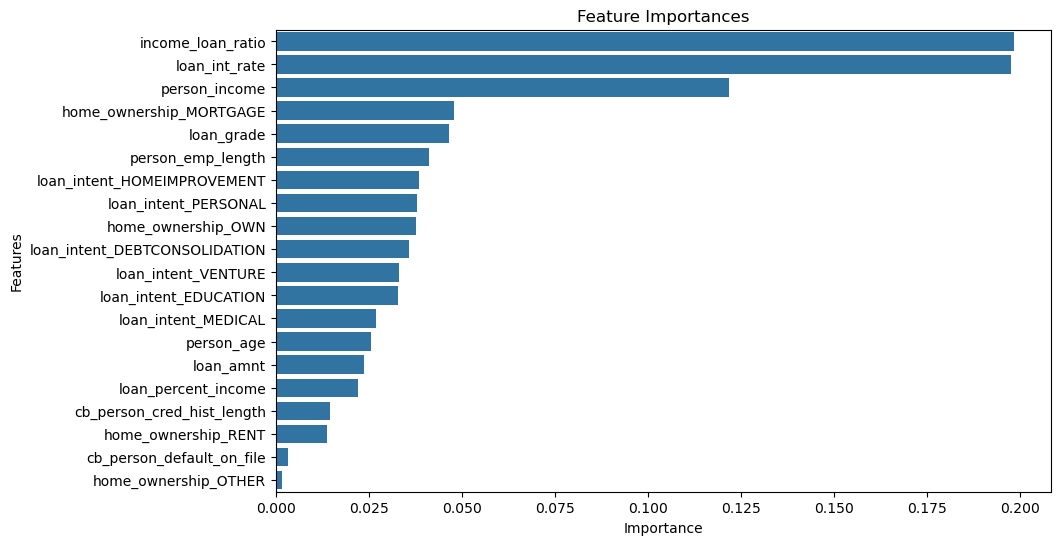

In [42]:
# Get feature importances
feature_importances = pd.DataFrame(dt.feature_importances_, index=x_train_smote.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [43]:
# Select top N features 
top_features = feature_importances.head(15).index
x_train_smote_selected = x_train_smote[top_features]
x_test_selected = x_test[top_features]

In [44]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train_smote_selected, y_train_smote)

# Best estimator
best_dt = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93     20218
           1       0.98      0.88      0.93     20218

    accuracy                           0.93     40436
   macro avg       0.94      0.93      0.93     40436
weighted avg       0.94      0.93      0.93     40436

Training Confusion Matrix:
[[19916   302]
 [ 2523 17695]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5054
           1       0.89      0.69      0.78      1409

    accuracy                           0.91      6463
   macro avg       0.91      0.83      0.86      6463
weighted avg       0.91      0.91      0.91      6463



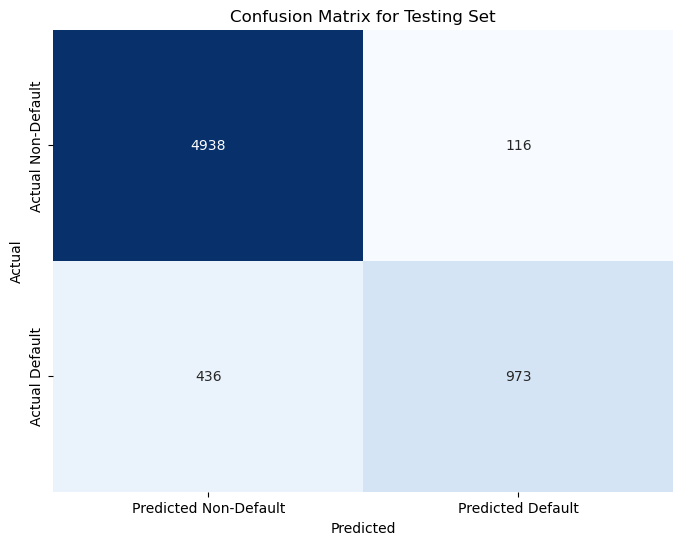

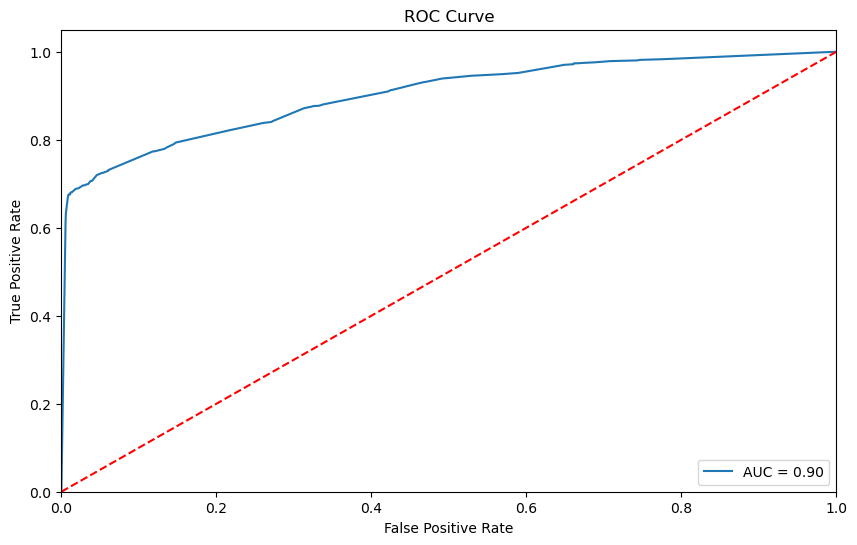

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming best_dt is defined and trained, and x_train_smote_selected and x_test_selected are the selected features.

# Print classification report and confusion matrix for training set
y_train_pred = best_dt.predict(x_train_smote_selected)
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_smote, y_train_pred))

# Compute confusion matrix for testing set
y_test_pred = best_dt.predict(x_test_selected)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix as a heatmap (cmap)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Non-Default', 'Predicted Default'], yticklabels=['Actual Non-Default', 'Actual Default'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for testing set
y_test_prob = best_dt.predict_proba(x_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [46]:
# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(best_dt, x_test_selected, y_test, 'Decision Tree')

# Ensemble Techniques

# Random Forest

# Feature Selection

In [47]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [48]:
# Select top N features 
top_features = feature_importances.head(15).index
x_train_smote_selected = x_train_smote[top_features]
x_test_selected = x_test[top_features]

# Hyperparameter Tuning

In [49]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train_smote_selected, y_train_smote)

# Best estimator
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


# Model Evaluation

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20218
           1       1.00      1.00      1.00     20218

    accuracy                           1.00     40436
   macro avg       1.00      1.00      1.00     40436
weighted avg       1.00      1.00      1.00     40436

Training Confusion Matrix:
[[20218     0]
 [    0 20218]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5054
           1       0.93      0.74      0.82      1409

    accuracy                           0.93      6463
   macro avg       0.93      0.86      0.89      6463
weighted avg       0.93      0.93      0.93      6463

Testing Confusion Matrix:
[[4970   84]
 [ 373 1036]]


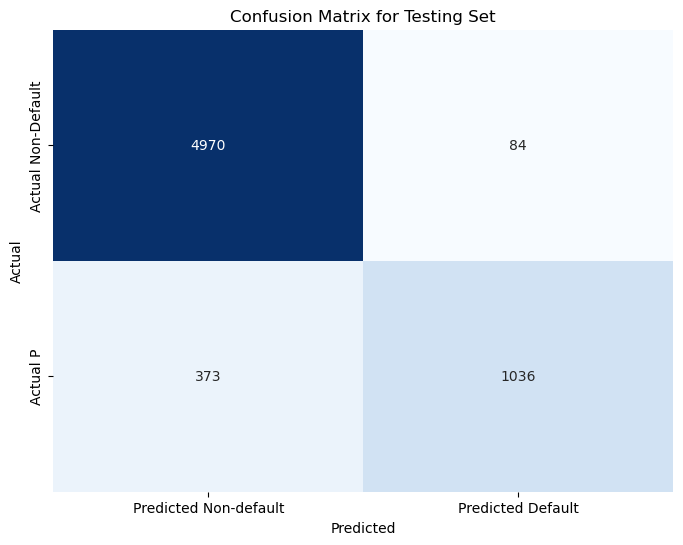

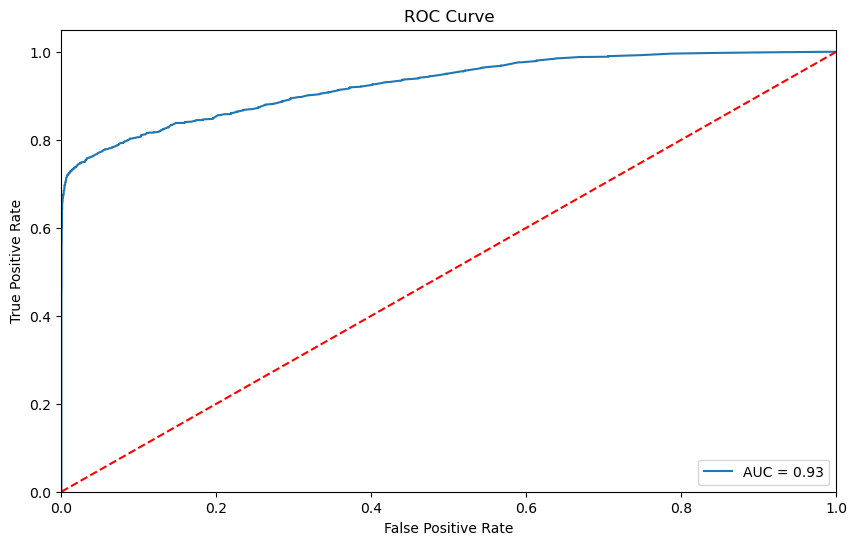

In [50]:
# Print classification report and confusion matrix for training set
y_train_pred = best_rf.predict(x_train_smote_selected)
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_smote, y_train_pred))

# Print classification report for testing set
y_test_pred = best_rf.predict(x_test_selected)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrix as a heatmap (cmap)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Non-default', 'Predicted Default'], yticklabels=['Actual Non-Default', 'Actual P'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for testing set
y_test_prob = best_rf.predict_proba(x_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
# Save the final performance of Decision Tree classifier
RF_result = metrics_calculator(best_rf, x_test_selected, y_test, 'Random Forest')

# Bagging 

# Feature Selection

In [52]:
# Train a Decision Tree classifier to get feature importances
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

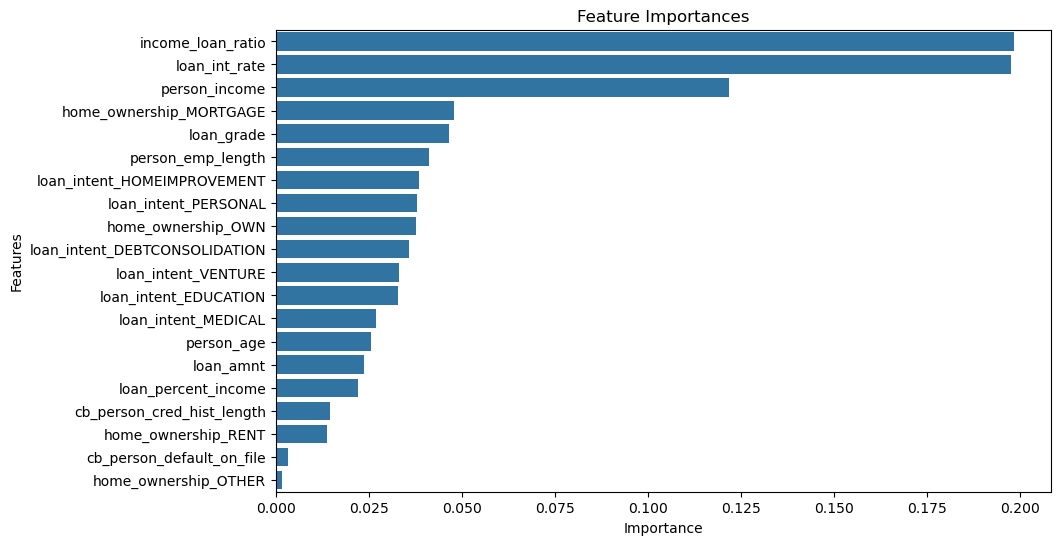

In [53]:
# Get feature importances
feature_importances = pd.DataFrame(dt.feature_importances_, index=x_train_smote.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [54]:
# Select top N features 
top_features = feature_importances.head(15).index
x_train_smote_selected = x_train_smote[top_features]
x_test_selected = x_test[top_features]

# Hyperparameter Tuning

In [55]:
from sklearn.ensemble import BaggingClassifier
# Create a BaggingClassifier with a DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train_smote_selected, y_train_smote)

# Best estimator
best_bagging = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


# Model Evaluation

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20218
           1       1.00      1.00      1.00     20218

    accuracy                           1.00     40436
   macro avg       1.00      1.00      1.00     40436
weighted avg       1.00      1.00      1.00     40436

Training Confusion Matrix:
[[20218     0]
 [    0 20218]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5054
           1       0.93      0.73      0.82      1409

    accuracy                           0.93      6463
   macro avg       0.93      0.86      0.89      6463
weighted avg       0.93      0.93      0.92      6463

Testing Confusion Matrix:
[[4973   81]
 [ 383 1026]]


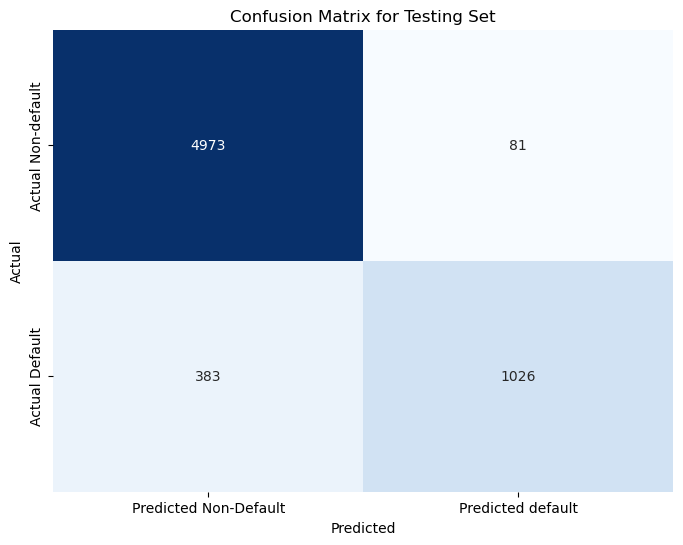

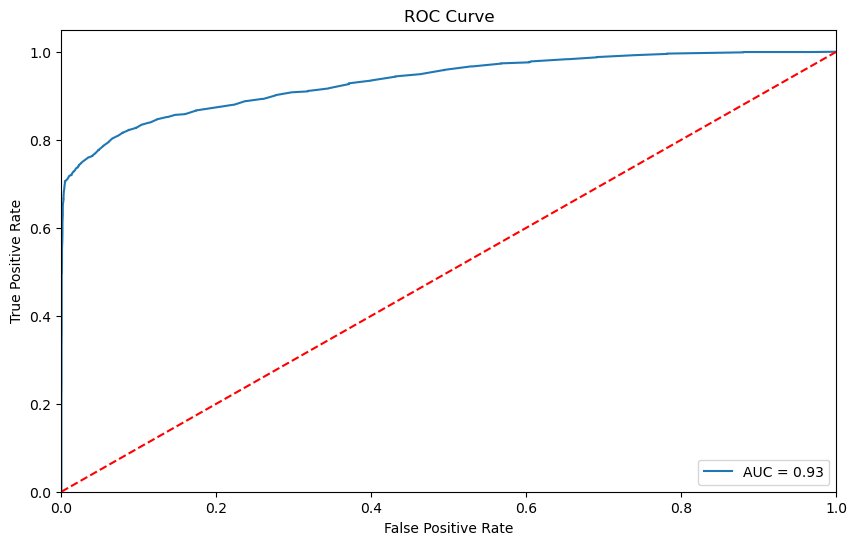

In [56]:
# Print classification report and confusion matrix for training set
y_train_pred = best_bagging.predict(x_train_smote_selected)
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_smote, y_train_pred))

# Print classification report for testing set
y_test_pred = best_bagging.predict(x_test_selected)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrix as a heatmap (cmap)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Non-Default', 'Predicted default'], yticklabels=['Actual Non-default', 'Actual Default'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for testing set
y_test_prob = best_bagging.predict_proba(x_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
# Save the final performance for bagging classifier
bagg_result = metrics_calculator(best_bagging, x_test_selected, y_test, 'Bagging')

# XGboost

# Feature Selection

In [58]:
# Train a Random Forest classifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

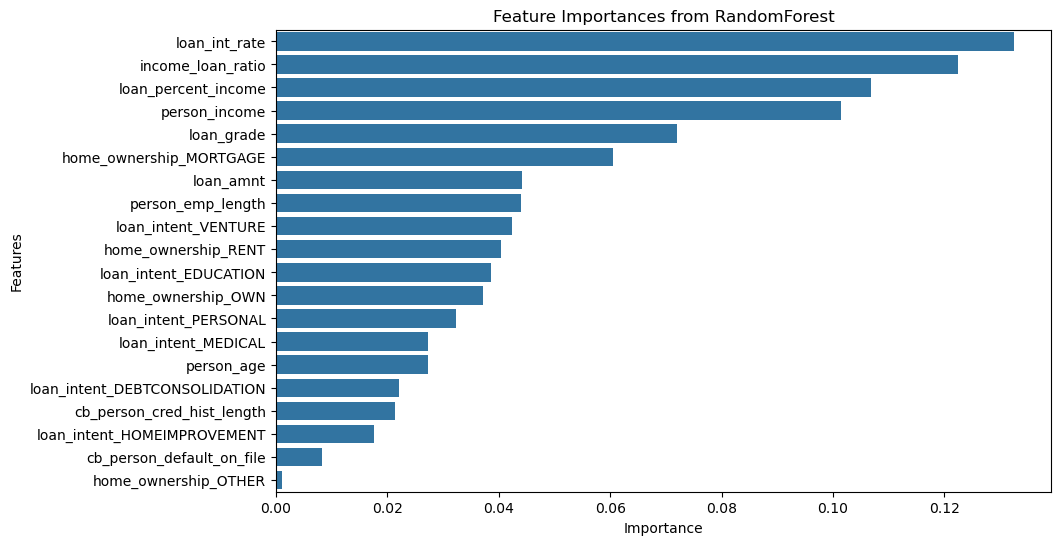

In [59]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=x_train_smote.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Step 2: Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [60]:
# Select top 15 features
top_features = feature_importances.head(15).index
x_train_smote_selected = x_train_smote[top_features]
x_test_selected = x_test[top_features]

In [61]:
# Step 3: Hyperparameter tuning using GridSearchCV for XGBoost

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set tree_method to 'hist' to use CPU
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss', tree_method='hist')

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', error_score='raise')

# Fit the model
grid_search.fit(x_train_smote_selected, y_train_smote)

# Best estimator
best_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


# Model Evaluation

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20218
           1       0.99      0.97      0.98     20218

    accuracy                           0.98     40436
   macro avg       0.98      0.98      0.98     40436
weighted avg       0.98      0.98      0.98     40436

Training Confusion Matrix:
[[20119    99]
 [  700 19518]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5054
           1       0.88      0.74      0.81      1409

    accuracy                           0.92      6463
   macro avg       0.91      0.86      0.88      6463
weighted avg       0.92      0.92      0.92      6463

Testing Confusion Matrix:
[[4911  143]
 [ 362 1047]]


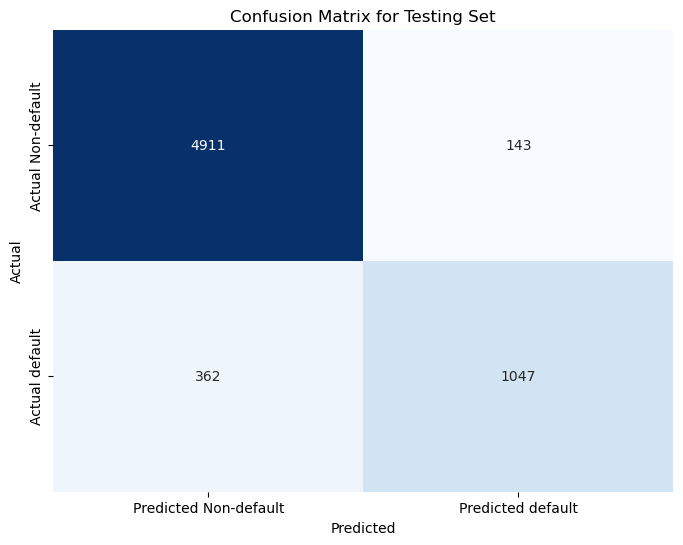

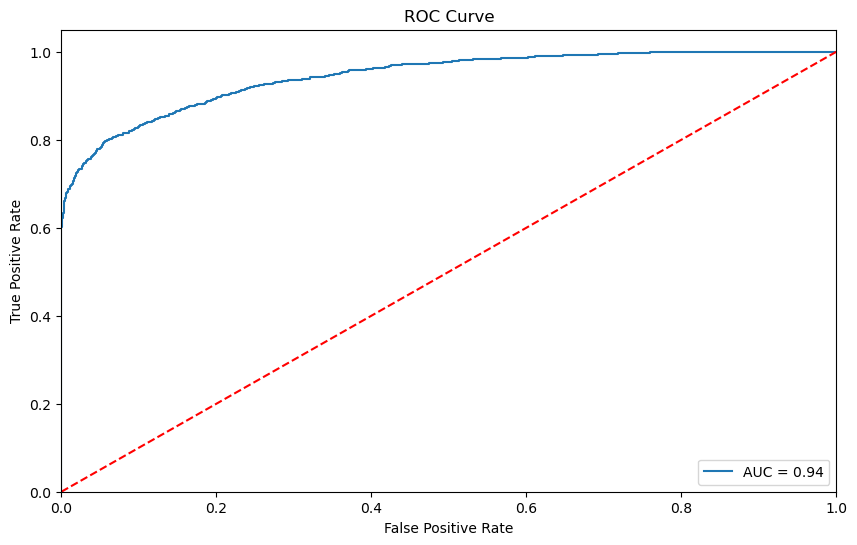

In [62]:
# Print classification report and confusion matrix for training set
y_train_pred = best_xgb.predict(x_train_smote_selected)
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_smote, y_train_pred))

# Print classification report for testing set
y_test_pred = best_xgb.predict(x_test_selected)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrix as a heatmap (cmap)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Non-default', 'Predicted default'], yticklabels=['Actual Non-default', 'Actual default'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for testing set
y_test_prob = best_xgb.predict_proba(x_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Save the final performance for XGBoost classifier
XGb_result= metrics_calculator(best_xgb, x_test_selected, y_test, 'XGBoost')

# Extra Trees

# Feature Selection

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
# Train an Extra Trees classifier to get feature importances
et = ExtraTreesClassifier(random_state=42)
et.fit(x_train_smote, y_train_smote)

ExtraTreesClassifier(random_state=42)

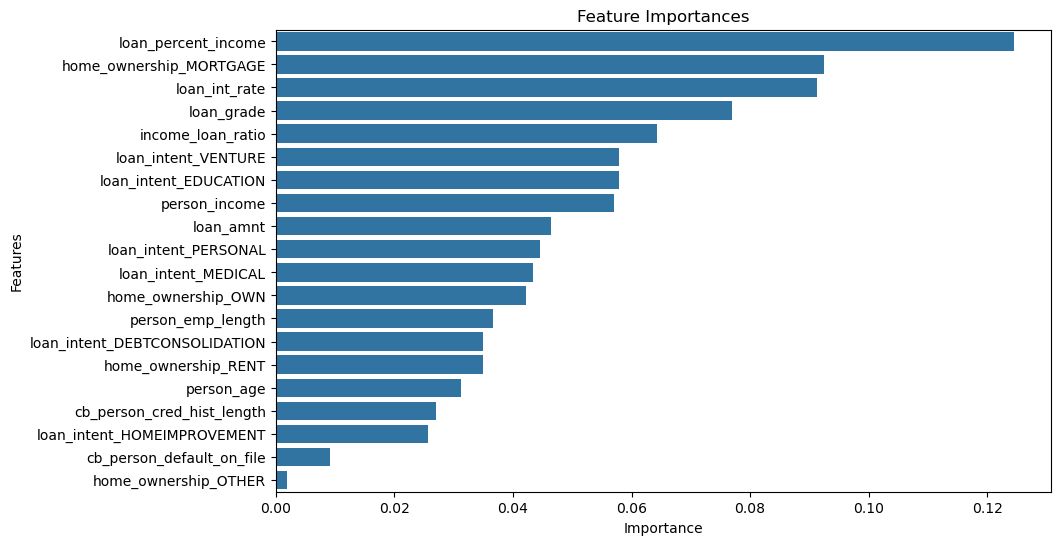

In [65]:
# Get feature importances
feature_importances = pd.DataFrame(et.feature_importances_, index=x_train_smote.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [66]:
# Select top N features 
top_features = feature_importances.head(15).index
x_train_smote_selected = x_train_smote[top_features]
x_test_selected = x_test[top_features]

# HyperParameter Tuning

In [67]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=ExtraTreesClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train_smote_selected, y_train_smote)

# Best estimator
best_et = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


# Model Evaluation

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20218
           1       1.00      1.00      1.00     20218

    accuracy                           1.00     40436
   macro avg       1.00      1.00      1.00     40436
weighted avg       1.00      1.00      1.00     40436

Training Confusion Matrix:
[[20218     0]
 [    0 20218]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5054
           1       0.83      0.72      0.77      1409

    accuracy                           0.91      6463
   macro avg       0.88      0.84      0.86      6463
weighted avg       0.90      0.91      0.90      6463

Testing Confusion Matrix:
[[4847  207]
 [ 393 1016]]


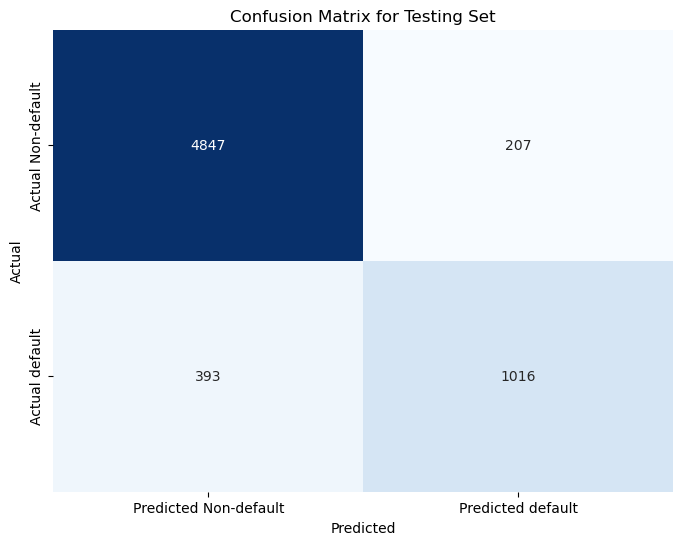

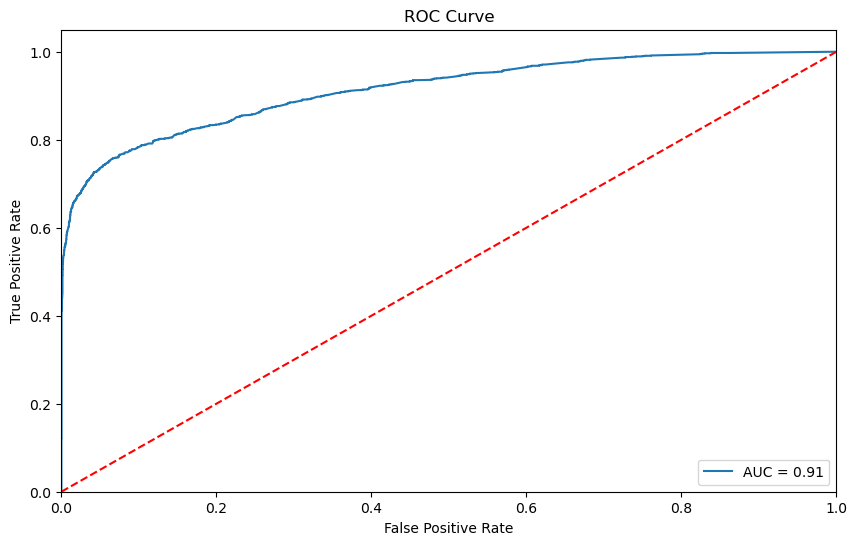

In [68]:
# Print classification report and confusion matrix for training set
y_train_pred = best_et.predict(x_train_smote_selected)
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_smote, y_train_pred))

# Print classification report for testing set
y_test_pred = best_et.predict(x_test_selected)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrix as a heatmap (cmap)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Non-default', 'Predicted default'], yticklabels=['Actual Non-default', 'Actual default'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for testing set
y_test_prob = best_et.predict_proba(x_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [69]:
# Save the final performance for Extra Trees classifier
xtra_trees_result = metrics_calculator(best_et, x_test_selected, y_test, 'Extra Trees')

# Adaboost

# Feature Selection

In [70]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Train a Random Forest classifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

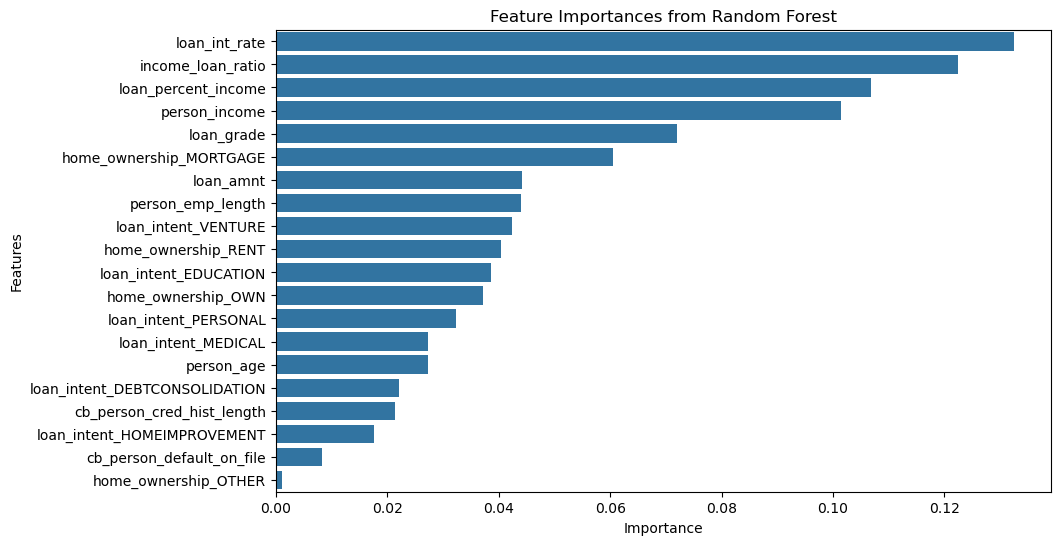

In [71]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=x_train_smote.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [72]:
# Select top 15 features
top_features = feature_importances.head(15).index
x_train_smote_selected = x_train_smote[top_features]
x_test_selected = x_test[top_features]

# HyperParameter Tuning

In [73]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Hyperparameter tuning using GridSearchCV for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}

# Set the algorithm to 'SAMME' to avoid the deprecation warning
grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42, algorithm='SAMME'), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train_smote_selected, y_train_smote)

# Best estimator
best_ab = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'learning_rate': 1, 'n_estimators': 200}


# Model Evaluation

Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     20218
           1       0.89      0.87      0.88     20218

    accuracy                           0.88     40436
   macro avg       0.88      0.88      0.88     40436
weighted avg       0.88      0.88      0.88     40436

Training Confusion Matrix:
[[18140  2078]
 [ 2618 17600]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5054
           1       0.67      0.72      0.69      1409

    accuracy                           0.86      6463
   macro avg       0.79      0.81      0.80      6463
weighted avg       0.86      0.86      0.86      6463

Testing Confusion Matrix:
[[4546  508]
 [ 394 1015]]


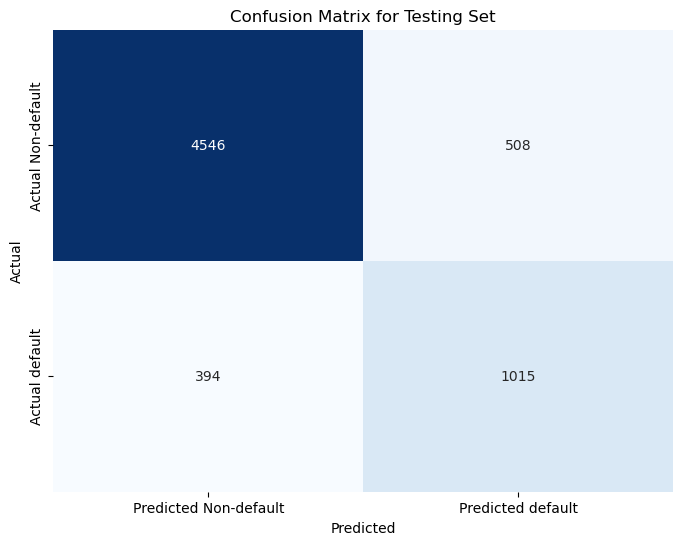

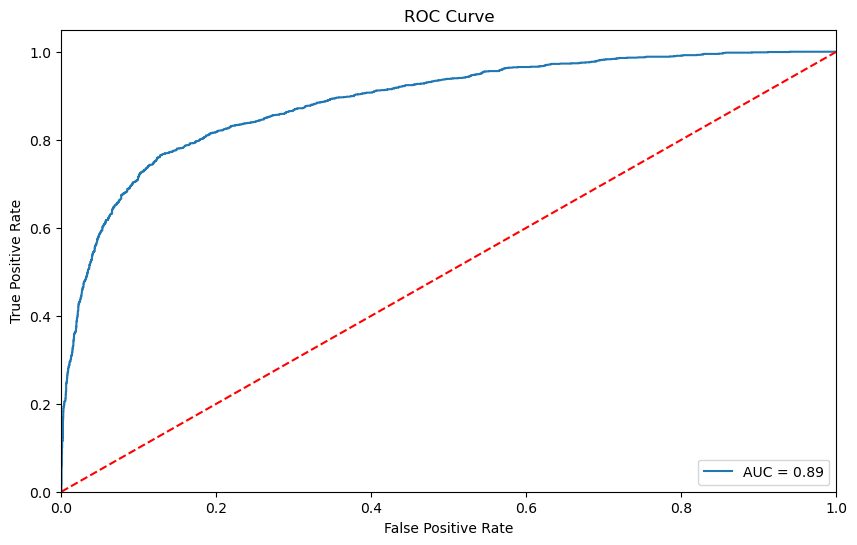

In [74]:
# Print classification report and confusion matrix for training set
y_train_pred = best_ab.predict(x_train_smote_selected)
print("Training Classification Report:")
print(classification_report(y_train_smote, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_smote, y_train_pred))

# Print classification report for testing set
y_test_pred = best_ab.predict(x_test_selected)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrix as a heatmap (cmap)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Non-default', 'Predicted default'], yticklabels=['Actual Non-default', 'Actual default'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for testing set
y_test_prob = best_ab.predict_proba(x_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [75]:
# Save the final performance for Extra Trees classifier
Adaboost_result = metrics_calculator(best_ab, x_test_selected, y_test, 'Adaboost')

# Model Comparison

In [76]:
# Concatenate results into a single DataFrame
results = pd.DataFrame([dt_result,XGb_result , bagg_result, RF_result, xtra_trees_result, Adaboost_result])

# Sort the DataFrame by Accuracy in descending order
results_sorted = results.sort_values(by='Accuracy', ascending=False)

# Display the sorted results
results_sorted.reset_index(drop=True, inplace=True)
# Display the sorted DataFrame as a table
from IPython.display import display
display(results_sorted)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.93,0.93,0.74,0.82,0.93
1,Bagging,0.93,0.93,0.73,0.82,0.93
2,XGBoost,0.92,0.88,0.74,0.81,0.94
3,Decision Tree,0.91,0.89,0.69,0.78,0.90
4,Extra Trees,0.91,0.83,0.72,0.77,0.91
5,Adaboost,0.86,0.67,0.72,0.69,0.89


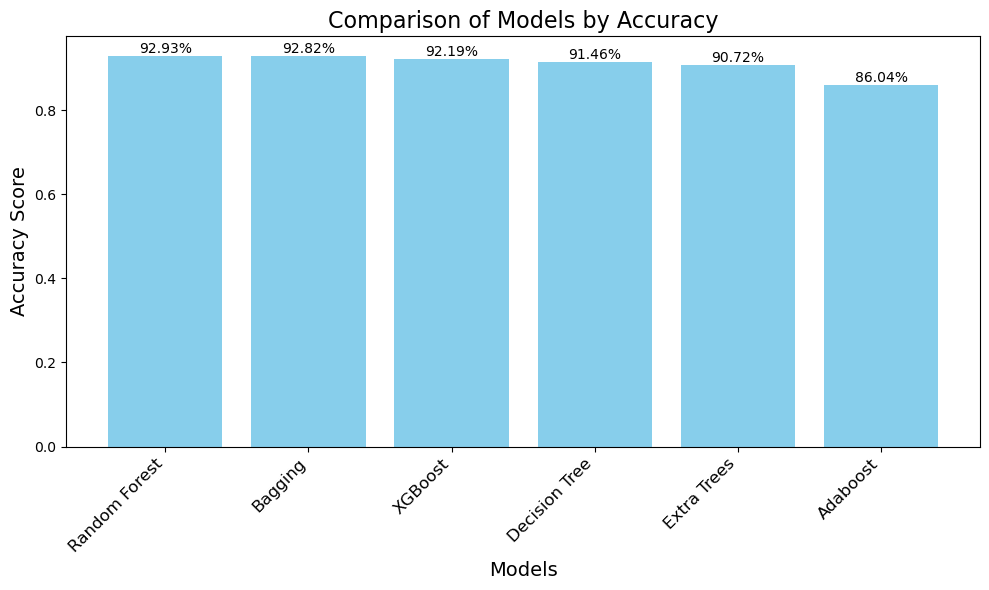

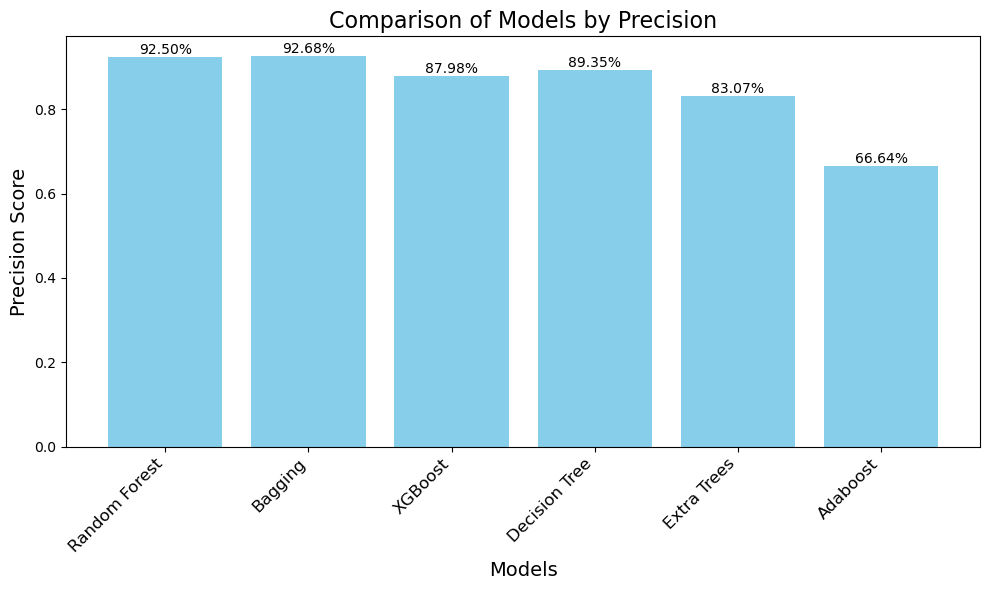

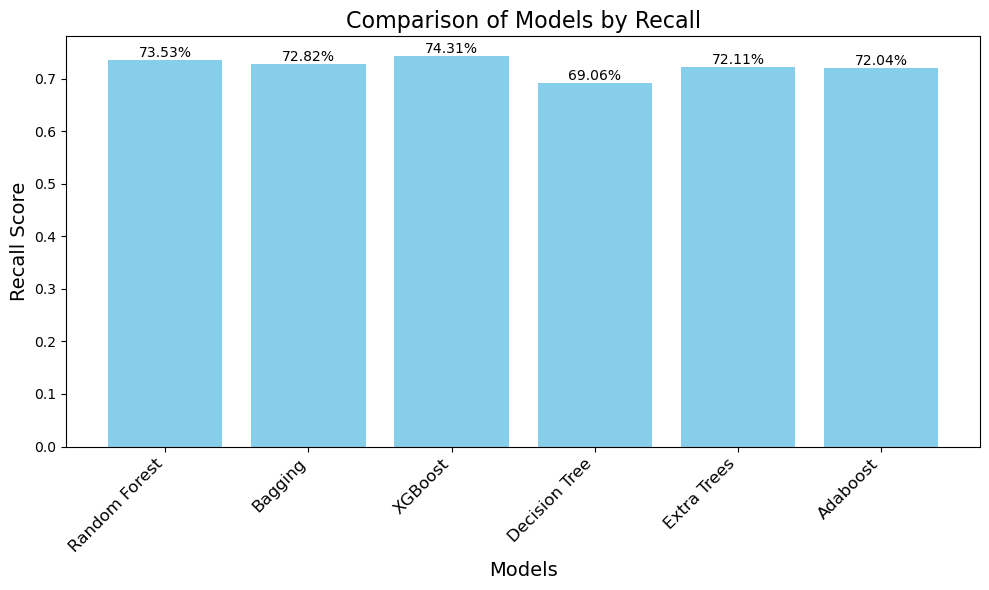

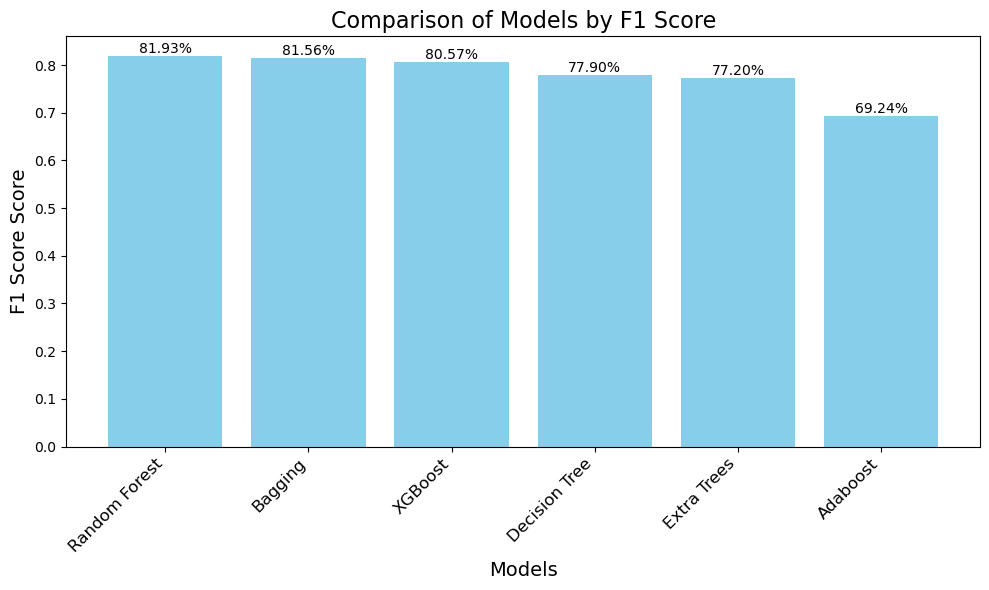

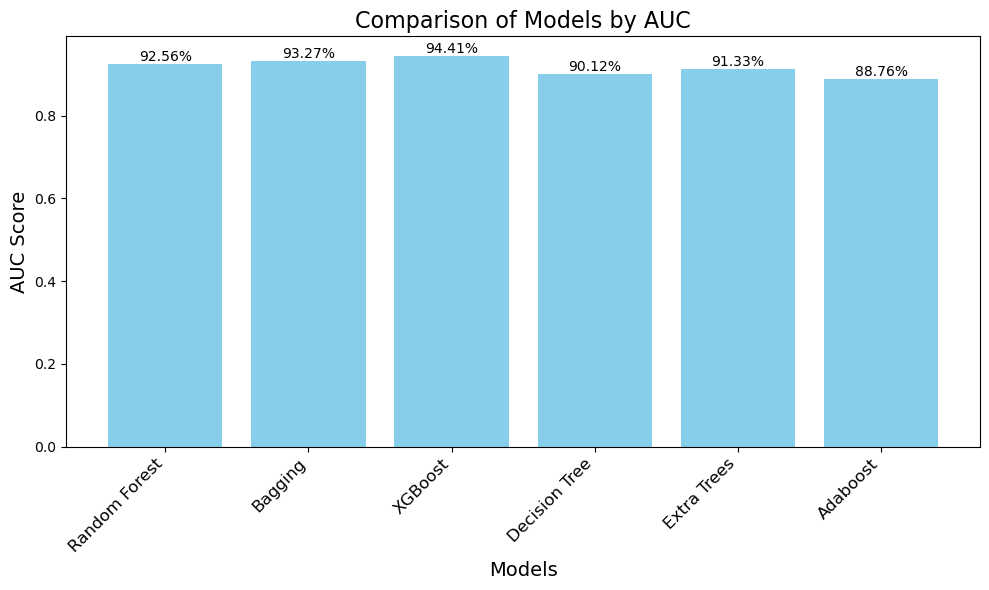

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and model names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
model_names = results_sorted['Model']

# Loop through each metric and create a separate bar plot
for metric in metrics:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names, results_sorted[metric], color='skyblue')
    
    # Annotate each bar with the percentage value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=10)
    
    # Add labels and title
    plt.xlabel('Models', fontsize=14)
    plt.ylabel(f'{metric} Score', fontsize=14)
    plt.title(f'Comparison of Models by {metric}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()


* Based on the comparison, the Random Forest and Bagging are the best performing models for credit risk prediction, given high accuracy , precision, F1 score, and AUC.  These models are robust and effective in capturing complex relationships within the data, making them suitable for this task. XGBoost also performs exceptionally well and is a strong candidate, especially considering its high AUC, which indicates excellent discrimination ability between classes.

# Conclusion

* This project aimed to develop a robust model for predicting credit risk, specifically identifying factors that influence loan default. Several machine learning models were employed, including Random Forest, Bagging, XGBoost, Decision Tree, Extra Trees, and Adaboost. Among these, Random Forest and Bagging emerged as the top performers. Some of the top features influencing credit risk include,Loan interest rate, Borrower's income, Income-to-loan ratio, Loan grade, Home ownership status (specifically mortgage and rent), Employment length, and Loan amount.

**Recommendations**:

* The Bank can utilize Random Forest, bagging or XGboost models for assessing loan applicants.  These models provide high accuracy and are effective in managing imbalanced datasets typical in credit risk scenarios.
* Pay special attention to the loan interest rate, borrower's income, and income-to-loan ratio when evaluating loan applications. Higher interest rates and lower income relative to loan size are strong predictors of default. 

* Bank can Offer competitive interest rates to lower-risk borrowers and consider higher scrutiny for high-interest loan applicants to ensure they can manage the repayment burden.

* Consider the borrower's employment stability and home ownership status. Applicants with shorter employment history and home ownership (particularly those with mortgages and renting) tend to be higher risk.  





# **By Nelufhangani Ndivhuwo**
